In [1]:
'''
Lesson 2: DeepLearningPytorch

Part 6:  Save and Load Models

'''

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
# model added - imported it from github
# curl -LJO https://raw.githubusercontent.com/udacity/DL_PyTorch/master/fc_model.py 
# model for building a full connected classifier
import fc_model

In [2]:
#Data set is gray scale 2
transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define a transform to normalize the data
#transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
# Download and load the training data
trainset = datasets.FashionMNIST('~\AnacondaProjects/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~\AnacondaProjects/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

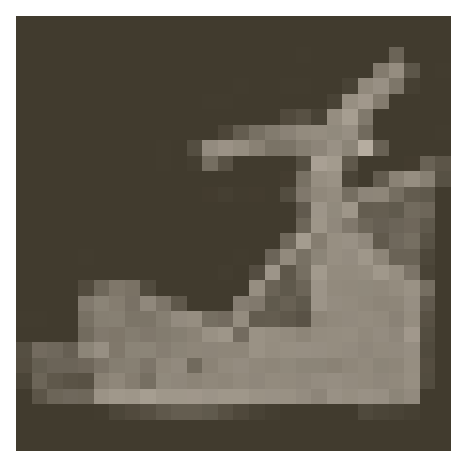

In [3]:
# see image example
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
# Create the network, define the criterion and optimizer

#784 input units
#10 output units
# size of 3 hidden unit layers

model = fc_model.Network(784, 10, [512, 256, 128])
# negative log likelihood loss
criterion = nn.NLLLoss()
#Adam optimizer to train  network, update parameters
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
#call train method in fc_module and it will train it for us
# 2 weeks of training - 84% accuracy

fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.701..  Test Loss: 0.947..  Test Accuracy: 0.665
Epoch: 1/2..  Training Loss: 1.057..  Test Loss: 0.759..  Test Accuracy: 0.726
Epoch: 1/2..  Training Loss: 0.903..  Test Loss: 0.693..  Test Accuracy: 0.745
Epoch: 1/2..  Training Loss: 0.787..  Test Loss: 0.646..  Test Accuracy: 0.747
Epoch: 1/2..  Training Loss: 0.756..  Test Loss: 0.624..  Test Accuracy: 0.758
Epoch: 1/2..  Training Loss: 0.711..  Test Loss: 0.607..  Test Accuracy: 0.773
Epoch: 1/2..  Training Loss: 0.671..  Test Loss: 0.612..  Test Accuracy: 0.772
Epoch: 1/2..  Training Loss: 0.651..  Test Loss: 0.558..  Test Accuracy: 0.788
Epoch: 1/2..  Training Loss: 0.648..  Test Loss: 0.544..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.675..  Test Loss: 0.548..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.634..  Test Loss: 0.533..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.620..  Test Loss: 0.513..  Test Accuracy: 0.808
Epoch: 1/2..  Training Loss: 0.630..  Test Loss: 0.5

In [6]:
#network saved and load network stored in model's state_dict
#weight and bias matrix for each layer

print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
#save model to file checkpoint
torch.save(model.state_dict(), 'checkpoint.pth')

In [8]:
# load state dictionary
# Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture
# state contains all weights and biases for network
# pth extension for Pytorch checkpoints

state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [9]:
# rebuild model exactly as when it was changed - first rebuild dictionary of model saved  to checkpoint
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [10]:
#checkpoint has all info necessary to rebuild the trained model

def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [11]:
# load checkpoints - rebuild trained model

model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
